In [1]:
%matplotlib inline



The [mne.Evoked](https://martinos.org/mne/dev/generated/mne.Evoked.html) data structure: evoked/averaged data
=====================================================================

The [`mne.Evoked`](https://martinos.org/mne/dev/generated/mne.Evoked.html) data structure is mainly used for storing
averageddata over trials. In MNE the evoked objects are usually created by
averaging epochs data with [`mne.Epochs.average`](https://martinos.org/mne/dev/generated/mne.Epochs.html#mne.Epochs.average).



In [2]:
import os.path as op

import mne

Here for convenience we read the evoked dataset from a file.



In [3]:
data_path = mne.datasets.sample.data_path()
fname = op.join(data_path, 'MEG', 'sample', 'sample_audvis-ave.fif')
evokeds = mne.read_evokeds(fname, baseline=(None, 0), proj=True)
print(evokeds)

#can specify conditino e.g. left visual otherwise returns list of all conditions 

Reading /home/jovyan/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Right Auditory)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline corr

Notice that the reader function returned a list of evoked instances. This is
because you can store multiple categories into a single file. Here we have
categories of
``['Left Auditory', 'Right Auditory', 'Left Visual', 'Right Visual']``.
We can also use ``condition`` parameter to read in only one category.



In [4]:
evoked = mne.read_evokeds(fname, condition='Left Auditory')
evoked.apply_baseline((None, 0)).apply_proj()
print(evoked)

Reading /home/jovyan/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
Applying baseline correction (mode: mean)
Projections have already been applied. Setting proj attribute to True.
<Evoked  |  'Left Auditory' (mean, N=55), [-0.1998, 0.49949] sec, 376 ch, ~4.8 MB>


The [Info](https://martinos.org/mne/stable/auto_tutorials/plot_info.html) attribute is also present here just as in raw and epochs.


In [5]:
print(evoked.info)
print(evoked.times)
#evoked.times times relative to t=0 (cut times)

<Info | 20 non-empty fields
    bads : list | MEG 2443, EEG 053
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (GRAD: 204, MAG: 102, STIM: 9, EEG: 60, EOG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 146 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 40.0 Hz
    maxshield : bool | False
    meas_date : tuple | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    nchan : int | 376
    proc_history : list | 0 items
    projs : list | PCA-v1: on, PCA-v2: on, PCA-v3: on, ...
    sfreq : float | 600.614990234375 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    gantry_angle : NoneType
    hpi_subsystem

The evoked data structure also contains some new attributes easily
accessible:



In [7]:
print(evoked.nave)  # Number of averaged epochs.
print(evoked.first)  # First time sample.
print(evoked.last)  # Last time sample.
print(evoked.comment)  # Comment on dataset. Usually the condition.
print(evoked.kind)  # Type of data, either average or standard_error.

55
-120
300
Left Auditory
average


The data is also easily accessible. Since the evoked data arrays are usually
much smaller than raw or epochs datasets, they are preloaded into the memory
when the evoked object is constructed. You can access the data as a numpy
array.



In [7]:
data = evoked.data
print(data.shape)
#cannot slice evoked object like raw, get from array

(376, 421)


The data is arranged in an array of shape `(n_channels, n_times)`. Notice
that unlike epochs, evoked object does not support indexing. This means that
to access the data of a specific channel you must use the data array
directly.



In [8]:
print('Data from channel {0}:'.format(evoked.ch_names[10]))
print(data[10])

Data from channel MEG 0142:


NameError: name 'data' is not defined

If you want to import evoked data from some other system and you have it in a
numpy array you can use [mne.EvokedArray](https://martinos.org/mne/stable/generated/mne.EvokedArray.html) for that. All you need is
the data and some info about the evoked data. 


In [9]:
evoked = mne.EvokedArray(data, evoked.info, tmin=evoked.times[0])


For more information, see
[Creating MNE's data structures from scratch](https://martinos.org/mne/stable/auto_tutorials/plot_creating_data_structures.html#tut-creating-data-structures).

Visualization
-------------

We can plot the evoked response

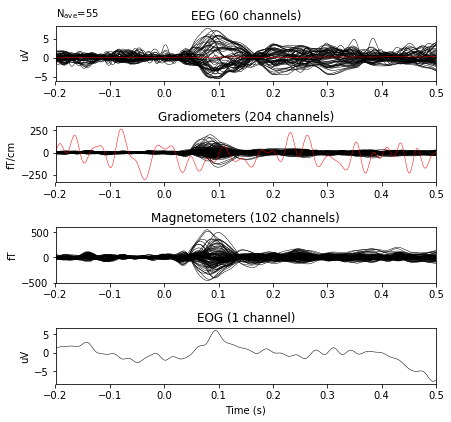

In [9]:
evoked.plot(time_unit='s', exclude=[]);
#because exclude empty list shows bad channels in red -> default 
#if exclude=bads wont show them
#create own evoked object 

We can also plot the topographic map for some time instances

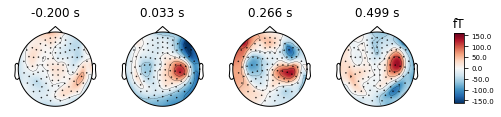

In [11]:
evoked.plot_topomap();

Or even plot them both together ...

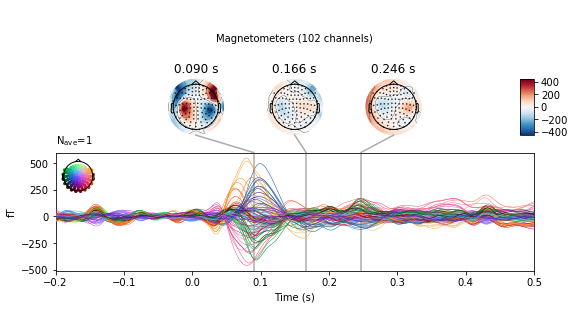

In [12]:
evoked.copy().pick_types(meg='mag').plot_joint();
#colors of lines tell you where sensors are coming from 

To contrast evokeds, we can do

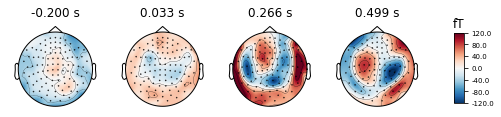

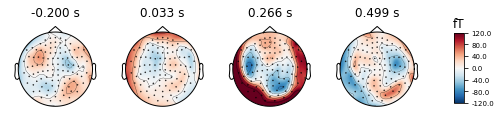

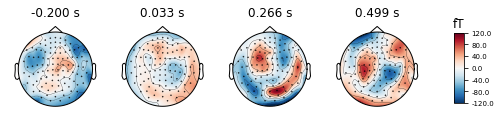

In [13]:
vmin, vmax =-120, 120
evokeds[2].plot_topomap(vmin=vmin, vmax=vmax);
evokeds[3].plot_topomap(vmin=vmin, vmax=vmax);
contrast = mne.combine_evoked(evokeds[2:], weights=[1, -1])
contrast.plot_topomap(vmin=vmin, vmax=vmax);

Exercises
--------------

1) How will you save evoked data to disk?


In [14]:
evoked.save('test-ave.fif')

2) Can you plot the topomap at 10 evenly spaced time instances?

HINT: Use np.linspace

In [11]:
np.linspace?

Object `np.linspace` not found.


In [12]:
create_info?


Object `create_info` not found.


In [14]:
EvokedArray?


Object `EvokedArray` not found.
